In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step0. Loading library 

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 34.8 MB/s eta 0:00:00


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 43.8 MB/s eta 0:00:00


In [ ]:
!pip install Afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=e982c42881f849747529981507652baa079991cce6f1a160c3628d55b6caa65b
  Stored in directory: /root/.cache/pip/wheels/79/91/ee/8374d9bc8c6c0896a2db75afdfd63d43653902407a0e76cd94
Successfully built Afinn


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import datetime
import time
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from konlpy.tag import Kkma
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
import pyLDAvis
import pyLDAvis.gensim_models
from gensim import corpora, models
import gensim
from gensim.models import CoherenceModel
from gensim import corpora, models
from collections import Counter 

/usr/local/lib/python3.9/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


In [ ]:
import glob
from afinn import Afinn
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pd.set_option('mode.chained_assignment',  None)

# Step1. Loading Data 

In [ ]:
import pandas as pd

In [ ]:
nbs = pd.read_excel('/content/drive/MyDrive/NbS/2.전체 데이터.xlsx')   

In [ ]:
nbs

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,Document Type,Publication Stage,Open Access,Source,EID,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,"Jouin C., Mlocek Z.",57219668257;57219668269;,Evolutions of nature based solutions for storm...,2020,Techniques - Sciences - Methodes,115,3,NaN,61.0,70.0,...,Article,Final,NaN,Scopus,2-s2.0-85094632803,NaN,NaN,NaN,NaN,NaN
1,Buzási A.,56692966000;,Climate vulnerability and adaptation challenge...,2021,Climate,9,2,25,1.0,17.0,...,Article,Final,NaN,Scopus,2-s2.0-85100598191,NaN,NaN,NaN,NaN,NaN
2,"Yu G.-R., Yang M., Chen Z., Zhang L.-M.",55807480400;55703268000;57001631400;55077923500;,Technical approach and strategic plan for larg...,2021,Chinese Journal of Applied Ecology,32,4,NaN,1141.0,1153.0,...,Article,Final,NaN,Scopus,2-s2.0-85104538541,NaN,NaN,NaN,NaN,NaN
3,"Thorn J.P.R., Biancardi Aleu R., Wijesinghe A....",56613034600;57260808600;57226747891;5726048210...,Mainstreaming nature-based solutions for clima...,2021,Landscape and Urban Planning,216,NaN,104235,NaN,NaN,...,Article,Final,NaN,Scopus,2-s2.0-85115004828,NaN,NaN,NaN,NaN,NaN
4,"Schuerch M., Spencer T., Temmerman S., Kirwan ...",54783506900;55156903100;6602902860;10044268300...,Future response of global coastal wetlands to ...,2018,Nature,561,7722,NaN,231.0,234.0,...,Article,Final,NaN,Scopus,2-s2.0-85053248555,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,Antoušková M.,42161107100;,Economic value of recreation - Determinants in...,2012,Agris On-line Papers in Economics and Informatics,4,SUPPL.SPL. 4,NaN,3.0,9.0,...,Article,Final,NaN,Scopus,2-s2.0-84874044123,NaN,NaN,NaN,NaN,NaN
1052,Nicol R.,55173678200;,Entering the Fray: The role of outdoor educati...,2014,Educational Philosophy and Theory,46,5,NaN,449.0,461.0,...,Article,Final,NaN,Scopus,2-s2.0-84899996845,NaN,NaN,NaN,NaN,NaN
1053,"Boller F., Hunziker M., Conedera M., Elsasser ...",36647235100;6701797579;6603211787;7005909792;8...,Fascinating remoteness: The dilemma of hiking ...,2010,Mountain Research and Development,30,4,NaN,320.0,331.0,...,Article,Final,NaN,Scopus,2-s2.0-78649521966,NaN,NaN,NaN,NaN,NaN
1054,"Vedel S.E., Thorsen B.J., Jacobsen J.B.",15057304900;6701749452;35773326500;,"First-movers, non-movers, and social gains fro...",2009,Ecological Economics,68,2021-08-09 00:00:00,NaN,2363.0,2371.0,...,Article,Final,NaN,Scopus,2-s2.0-65649085241,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = nbs[['Title','Year','Abstract']]  
df.head()

,Title,Year,Abstract
0,Evolutions of nature based solutions for storm...,2020,Stormwater management is one of the greatest c...
1,Climate vulnerability and adaptation challenge...,2021,Wine producers face several challenges regardi...
2,Technical approach and strategic plan for larg...,2021,Terrestrial ecosystems are the core components...
3,Mainstreaming nature-based solutions for clima...,2021,(Despite a growing recognition of the importan...
4,Future response of global coastal wetlands to ...,2018,The response of coastal wetlands to sea-level ...


In [ ]:
uniqueyears, time_slices = np.unique(df.Year, return_counts=True)
print(uniqueyears, time_slices)

[2003 2006 2007 2009 2010 2012 2014 2015 2016 2017 2018 2019 2020 2021
 2022] [  1   1   1   1   1   2   5   7  20  51  73 123 263 485  22]


In [ ]:
# # 2016년 이후 논문만 추출 (기간 설정 부분)
# df = df[(df['Year'] >= 2016) & (df['Year'] <= 2022)]
# uniqueyears, time_slices = np.unique(df.Year, return_counts=True)
# print(uniqueyears, time_slices)

#### DTM이 아닌 기본 LDA를 돌리기 때문에 모든 연도 사용

In [ ]:
sum(time_slices)  # 논문 총 개수 1,056개

1056

In [ ]:
df = df.reset_index(drop = True)   # 인덱스 재조정 
df.head()

,Title,Year,Abstract
0,Evolutions of nature based solutions for storm...,2020,Stormwater management is one of the greatest c...
1,Climate vulnerability and adaptation challenge...,2021,Wine producers face several challenges regardi...
2,Technical approach and strategic plan for larg...,2021,Terrestrial ecosystems are the core components...
3,Mainstreaming nature-based solutions for clima...,2021,(Despite a growing recognition of the importan...
4,Future response of global coastal wetlands to ...,2018,The response of coastal wetlands to sea-level ...


# Step2-1. Data Cleaning
- 한글, 숫자, 특수문자 모두 제거  
- 고유명사, 문장 시작을 대문자인 영어의 특성을 고려해 모두 소문자로 변경  

In [ ]:
# # 영문자 이외 문자(한글, 숫자, 특수문자)는 공백으로 변환
df['Abstract'] = df['Abstract'].str.replace('[^a-zA-Z]',' ',regex=True)

# 고유명사, 첫시작 대문자를 고려하여 모두 소문자로 변경 
df['Abstract'] = df['Abstract'].str.lower()
df.head()

,Title,Year,Abstract
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...


# Step2-2. Word tokenization & Extract noun & Lemmatization
- 토큰화 
- 각 토큰마다 품사 태깅 후, 명사만 설정해서 추출  
- 원형 찾아서 통일 => ex. change,changes => change 
- 한글자 제거  

표제어 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']  
표제어 추출 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']

표제어 추출은 뒤에서 언급할 어간 추출과는 달리 단어의 형태가 적절히 보존되는 양상을 보이는 특징이 있습니다. 하지만 그럼에도 위의 결과에서는 dy나 ha와 같이 의미를 알 수 없는 적절하지 못한 단어를 출력하고 있습니다. 이는 표제어 추출기(lemmatizer)가 본래 단어의 품사 정보를 알아야만 정확한 결과를 얻을 수 있기 때문입니다.  

WordNetLemmatizer는 입력으로 단어가 동사 품사라는 사실을 알려줄 수 있습니다. 즉, dies와 watched, has가 문장에서 동사로 쓰였다는 것을 알려준다면 표제어 추출기는 품사의 정보를 보존하면서 정확한 Lemma를 출력하게 됩니다.



In [ ]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

In [ ]:
# 19초 소요 
df['Abstract_token'] = None

for i in range(len(df)):
    df['Abstract_token'][i] = nltk.word_tokenize(df['Abstract'][i])   # Word Tokenization
    df['Abstract_token'][i] = nltk.pos_tag(df['Abstract_token'][i])   # POS tagging
 
df.head()

,Title,Year,Abstract,Abstract_token
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, NN), (management, NN), (is, VBZ)..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, NN), (producers, NNS), (face, VBP), (s..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, JJ), (ecosystems, NNS), (are, V..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(despite, IN), (a, DT), (growing, VBG), (reco..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(the, DT), (response, NN), (of, IN), (coastal..."


In [ ]:
def get_wordnet_pos(pos_tag):  # https://ysyblog.tistory.com/88
    if pos_tag.startswith('V'):
        return 'v'
    elif pos_tag.startswith('N'):
        return 'n'
    elif pos_tag.startswith('J'):
        return 'a'
    elif pos_tag.startswith('R'):
        return 'r'
    else:
        return None

In [ ]:
for i in range(len(df)):
    temp_list = []
    for word, pos in df['Abstract_token'][i]:
        tag = get_wordnet_pos(pos)
        if tag != None:
            temp_list.append((word, get_wordnet_pos(pos)))
    
    df['Abstract_token'][i] = temp_list

In [ ]:
df.head()

,Title,Year,Abstract,Abstract_token
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (is, v), (g..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producers, n), (face, v), (severa..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystems, n), (are, v), ..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(growing, v), (recognition, n), (importance, ..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetlands, n), (..."


In [ ]:
# Stemming(어간추출)  => 생략. // 품사 보존이 안되는 경우가 많다. 기게적으로 자르기때문에

In [ ]:
# 1분 소요 
# Lemmaization(원형찾기) => 원형을 찾아 같은 의미의 단어 토큰들을 하나의 값으로 인지하도록 한다. 
wlem = nltk.WordNetLemmatizer()

for i in range(len(df)):

    lemmatized_words = []

    for word, pos in df['Abstract_token'][i]:
        new_word = wlem.lemmatize(word,pos)
        lemmatized_words.append((new_word,pos))
        df['Abstract_token'][i] = lemmatized_words


df.head()

,Title,Year,Abstract,Abstract_token
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (be, v), (g..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producer, n), (face, v), (several..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystem, n), (be, v), (c..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(grow, v), (recognition, n), (importance, n),..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetland, n), (s..."


In [ ]:
# 1분 30초 소요 
# 명사만 추출 ==> 이 과정에서 아마 green이 제거됐을 거라고 생각
df['Abstract_NN'] = None

for i in range(len(df)):

    NN_words = []
    
    for word, pos in df['Abstract_token'][i]:
        if ('n' in pos) :
            NN_words.append(word)
        df['Abstract_NN'][i] = NN_words   # Extract noun
    

df.head()

,Title,Year,Abstract,Abstract_token,Abstract_NN
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (be, v), (g...","[stormwater, management, challenge, environmen..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producer, n), (face, v), (several...","[wine, producer, challenge, climate, change, i..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystem, n), (be, v), (c...","[ecosystem, core, component, life, production,..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(grow, v), (recognition, n), (importance, n),...","[recognition, importance, infrastructure, ecos..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetland, n), (s...","[response, wetland, rise, twenty, century, sca..."


In [ ]:
# 1글자 제거 => 제거되는 거 없음  
df['Abstract_NN'] = df['Abstract_NN'].apply(lambda x: [word for word in x if (len(word) > 1 )])
df.head()

,Title,Year,Abstract,Abstract_token,Abstract_NN
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (be, v), (g...","[stormwater, management, challenge, environmen..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producer, n), (face, v), (several...","[wine, producer, challenge, climate, change, i..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystem, n), (be, v), (c...","[ecosystem, core, component, life, production,..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(grow, v), (recognition, n), (importance, n),...","[recognition, importance, infrastructure, ecos..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetland, n), (s...","[response, wetland, rise, twenty, century, sca..."


# Step2-3. Stopwords processing

In [ ]:
#nltk에서 제공하는 불용어사전 이용
stopwords_list = stopwords.words('english')   # ex. I my me mine all should a ... 

In [ ]:
# stopwords_list

In [ ]:
# 사용자 정의 불용어 사전 
customized_stopwords = ['nature', 'based', 'solutions', 'nbs', 'studing', 'studies', 'study','management', 'manage', 'model', 'use', 
                        'plan', 'increase','service',  'result', 'system', 'implement','implementation', 'treat', 'treatment', 'change','area',
                        'framework','strategy','gi','removal','year','term','tool','scale','case','experiment','concept','log','msr','type','potential','literature',
                        'need','retention','finding','order','issue','application','sab','ce','context','ugi','knowledge','sbfs','gr','agb',
                        'offs','methodology','pm','number','ct','coefficient','cw','effectiveness']  

In [ ]:
customized_stopwords_2 = ['approach','author','analysis','benefit','impact','effect','research','planning','project','solution','challenge','development','journal','process','paper','nb',
                          'quality', 'method', 'level', 'article', 'data', 'value'
                          ]

In [ ]:
stopwords_list.extend(customized_stopwords)

In [ ]:
stopwords_list.extend(customized_stopwords_2)

In [ ]:
 # 불용어 제거 과정
 for i in range(len(df)):
     unique_NN_words = set(df['Abstract_NN'][i])
     final_NN_words = df['Abstract_NN'][i]

     for word in unique_NN_words:
         if word in stopwords_list:
             while word in final_NN_words: final_NN_words.remove(word)   # 불용어 제거 
     df['Abstract_NN'][i] = final_NN_words

In [ ]:
df.head()

,Title,Year,Abstract,Abstract_token,Abstract_NN
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (be, v), (g...","[stormwater, environment, way, environment, co..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producer, n), (face, v), (several...","[wine, producer, climate, industry, vulnerabil..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystem, n), (be, v), (c...","[ecosystem, core, component, life, production,..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(grow, v), (recognition, n), (importance, n),...","[recognition, importance, infrastructure, ecos..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetland, n), (s...","[response, wetland, rise, twenty, century, pro..."


# Step2-4. TF-IDF 
- 단순히 단어의 빈도만 고려한다면 모든 문서에서 자주 쓰일 수 밖에 없는 단어들이 중요하다고 인식 될 수 있습니다. 
- 모든 초록에 등장하는 단어는 의미가 없으니 정제해주는 과정이 필요함  
- TF-IDF :  단어의 빈도(Term Frequency)와 역 문서 빈도(Inverse Document Frequency)를 토대로, 특정 문서 내에 어떤 단어가 얼마나 중요한 지를 나타내는 통계적 수치.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df.head()

,Title,Year,Abstract,Abstract_token,Abstract_NN
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (be, v), (g...","[stormwater, environment, way, environment, co..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producer, n), (face, v), (several...","[wine, producer, climate, industry, vulnerabil..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystem, n), (be, v), (c...","[ecosystem, core, component, life, production,..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(grow, v), (recognition, n), (importance, n),...","[recognition, importance, infrastructure, ecos..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetland, n), (s...","[response, wetland, rise, twenty, century, pro..."


In [ ]:
def listToString(str_list):
    result = ""
    for s in str_list:
        result += s + " "
    return result.strip()

In [ ]:
df['Abstract_str'] = None

for i in range(len(df)):
    df['Abstract_str'][i] = listToString(df['Abstract_NN'][i])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_1290 = TfidfVectorizer(stop_words="english",
                            use_idf=True,
                            ngram_range=(1,2), # 1-grams, 2-grams만 고려함
                            max_df = 0.90)      #전체 문서의 90% 문서에 출현하는 단어들은 너무 빈번한 단어라고 판단하여 삭제                              

In [ ]:
vectorizer_1190 = TfidfVectorizer(stop_words="english",
                            use_idf=True,
                            ngram_range=(1,1), # 오직 1-grams만 고려함
                            max_df = 0.90)      #전체 문서의 90% 문서에 출현하는 단어들은 너무 빈번한 단어라고 판단하여 삭제    

In [ ]:
vectorizer_1295 = TfidfVectorizer(stop_words="english",
                            use_idf=True,
                            ngram_range=(1,2), # 오직 1-grams만 고려함
                            max_df = 0.95)      #전체 문서의 90% 문서에 출현하는 단어들은 너무 빈번한 단어라고 판단하여 삭제    

In [ ]:
## 기존 방식 
vectorizer_1195 = TfidfVectorizer(stop_words="english",
                            use_idf=True,
                            ngram_range=(1,1), # 오직 1-grams만 고려함
                            max_df = 0.95)      #전체 문서의 90% 문서에 출현하는 단어들은 너무 빈번한 단어라고 판단하여 삭제    

In [ ]:
tfidf1290 = vectorizer_1290.fit_transform(df['Abstract_str'])
tfidf1190 = vectorizer_1190.fit_transform(df['Abstract_str'])
tfidf1295 = vectorizer_1295.fit_transform(df['Abstract_str'])
tfidf1195 = vectorizer_1195.fit_transform(df['Abstract_str'])

In [ ]:
tf_idf_list_1290 = vectorizer_1290.get_feature_names_out()
tf_idf_list_1190 = vectorizer_1190.get_feature_names_out()
tf_idf_list_1295 = vectorizer_1295.get_feature_names_out()
tf_idf_list_1195 = vectorizer_1195.get_feature_names_out()

In [ ]:
tf_idf_list_1190

array(['aa', 'aac', 'aalismail', ..., 'zu', 'zurich', 'zwalm'],
      dtype=object)

In [ ]:
len(tf_idf_list_1290)

55373

In [ ]:
df['tfidf_NN_1290'] = None 
df['tfidf_NN_1190'] = None 
df['tfidf_NN_1295'] = None 
df['tfidf_NN_1195'] = None 


for i in range(len(df)):
    result = pd.DataFrame(df['Abstract_NN'][i])
    result1 = result[result[0].str.contains('|'.join(tf_idf_list_1290))][0].tolist()   # tf_idf_list에 해당되는 단어만 남겨두기 
    result2 = result[result[0].str.contains('|'.join(tf_idf_list_1190))][0].tolist()   # tf_idf_list에 해당되는 단어만 남겨두기 
    result3 = result[result[0].str.contains('|'.join(tf_idf_list_1295))][0].tolist()   # tf_idf_list에 해당되는 단어만 남겨두기 
    result4 = result[result[0].str.contains('|'.join(tf_idf_list_1195))][0].tolist()   # tf_idf_list에 해당되는 단어만 남겨두기 

    df['tfidf_NN_1290'][i] = result1
    df['tfidf_NN_1190'][i] = result2
    df['tfidf_NN_1295'][i] = result3
    df['tfidf_NN_1195'][i] = result4

In [ ]:
df.head()

,Title,Year,Abstract,Abstract_token,Abstract_NN,Abstract_str,tfidf_NN_1290,tfidf_NN_1190,tfidf_NN_1295,tfidf_NN_1195
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (be, v), (g...","[stormwater, environment, way, environment, co...",stormwater environment way environment constra...,"[stormwater, environment, way, environment, co...","[stormwater, environment, way, environment, co...","[stormwater, environment, way, environment, co...","[stormwater, environment, way, environment, co..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producer, n), (face, v), (several...","[wine, producer, climate, industry, vulnerabil...",wine producer climate industry vulnerability a...,"[wine, producer, climate, industry, vulnerabil...","[wine, producer, climate, industry, vulnerabil...","[wine, producer, climate, industry, vulnerabil...","[wine, producer, climate, industry, vulnerabil..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystem, n), (be, v), (c...","[ecosystem, core, component, life, production,...",ecosystem core component life production activ...,"[ecosystem, core, component, life, production,...","[ecosystem, core, component, life, production,...","[ecosystem, core, component, life, production,...","[ecosystem, core, component, life, production,..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(grow, v), (recognition, n), (importance, n),...","[recognition, importance, infrastructure, ecos...",recognition importance infrastructure ecosyste...,"[recognition, importance, infrastructure, ecos...","[recognition, importance, infrastructure, ecos...","[recognition, importance, infrastructure, ecos...","[recognition, importance, infrastructure, ecos..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetland, n), (s...","[response, wetland, rise, twenty, century, pro...",response wetland rise twenty century projectio...,"[response, wetland, rise, twenty, century, pro...","[response, wetland, rise, twenty, century, pro...","[response, wetland, rise, twenty, century, pro...","[response, wetland, rise, twenty, century, pro..."


In [ ]:
# 제거된 리스트 확인용
list_B = sum(df['Abstract_NN'].tolist(),[])
# len(list(set(list_B) - set(tf_idf_list_1290)))   # 제거된 단어 개수 
del_tfidf_1290 = pd.DataFrame(list(set(list_B) - set(tf_idf_list_1290)))
del_tfidf_1190 = pd.DataFrame(list(set(list_B) - set(tf_idf_list_1190)))
del_tfidf_1295 = pd.DataFrame(list(set(list_B) - set(tf_idf_list_1295)))
del_tfidf_1195 = pd.DataFrame(list(set(list_B) - set(tf_idf_list_1195)))

In [ ]:
pd.concat([del_tfidf_1190,del_tfidf_1290,del_tfidf_1195,del_tfidf_1295], axis = 1 , keys = ["1190","1290","1195","1295"])

,1190,1290,1195,1295
,0,0,0,0
0,nevertheless,nevertheless,nevertheless,nevertheless
1,ten,ten,ten,ten
2,fire,fire,fire,fire
3,de,de,de,de
4,hundred,hundred,hundred,hundred
5,show,show,show,show
6,third,third,third,third
7,thick,thick,thick,thick
8,besides,besides,besides,besides


- 1,2-gram & 90%,95% 결과 모두 동일하니 기존의 방법 1-gram, 95%로 세팅

In [ ]:
df.drop(['tfidf_NN_1290','tfidf_NN_1190','tfidf_NN_1295'], inplace = True, axis = 1)

In [ ]:
df.rename(columns = {'tfidf_NN_1195':'tfidf_NN'}, inplace = True)

In [ ]:
df.head()

,Title,Year,Abstract,Abstract_token,Abstract_NN,Abstract_str,tfidf_NN
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (be, v), (g...","[stormwater, environment, way, environment, co...",stormwater environment way environment constra...,"[stormwater, environment, way, environment, co..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producer, n), (face, v), (several...","[wine, producer, climate, industry, vulnerabil...",wine producer climate industry vulnerability a...,"[wine, producer, climate, industry, vulnerabil..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystem, n), (be, v), (c...","[ecosystem, core, component, life, production,...",ecosystem core component life production activ...,"[ecosystem, core, component, life, production,..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(grow, v), (recognition, n), (importance, n),...","[recognition, importance, infrastructure, ecos...",recognition importance infrastructure ecosyste...,"[recognition, importance, infrastructure, ecos..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetland, n), (s...","[response, wetland, rise, twenty, century, pro...",response wetland rise twenty century projectio...,"[response, wetland, rise, twenty, century, pro..."


In [ ]:
df_copy = df  # 중간에 df 형태 바뀔 수 있으니 저장해두기!

# Step5. LDA Modeling

## LDA Parameter 
1. topic : 토픽의 개수  
2. chunksize : 훈련 알고리즘에 사용할 문서 개수  => 빠른 학습이 필요하면, 청크 사이즈를 키우기, Hoffman 논문에 의하면 청크사이즈는 모델 품질에 영향을 미치치만 차이가 그렇게 크지 않다고 한다.  
3. passes : 모델 학습시 전체 코퍼스에서 모델을 학습시키는 빈도 제어 
4. iteration : 각 문서에 대해서 루푸를 얼마나 돌릴지  
5. pass & iteration은 클수록 좋은 편  
6. alpha, eta = auto  => 디리클레 분포의 감마함수에 대한 파라미터  

---
## LDA Measure  
1. Perplexity; 혼란도  
: 특정 확률 모델이 실제로 관측되는 값을 얼마나 잘 예측하는지를 뜻한다. 이 값이 작으면 토픽모델이 문서를 잘 반영된다고 알 수 있다.  **작은게 좋은 거**  

2. Coherence; 주제의 일관성  
: 해당 토픽모델이, 모델링이 잘 되었을수록 한 주제안에는 의미론적으로 유사한 단어가 많이 모여있게 마련이다. 따라서 상위 단어간의 유사도를 계산하면 실제로 해당 주제가 의미론적으로 일치하는 단어들끼리 모여있는지 알 수 있다. 

** 주의할 점 **
coherence가 너무 높아지면 정보의 양이 줄어들게 되고, 너무 낮아지면 인과성이 없어 분석의 의미가 낮아진다.  


---
# LDA 모델에 들어갈 객체 
- id2 word : Dictionary에 list of list of str 형식의 document를 입력하면 Dictionary가 학습된다.  
- corpus : 트윗 리스트 안의 단어를 bag-of-words 형태 -> list of(token_id, token_count) 2-tuple 로 변환  

In [ ]:
from gensim import models
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus
import numpy
from gensim.matutils import hellinger

In [ ]:
df = df.reset_index(drop = True)
df

In [ ]:
noun_list = df['tfidf_NN'].tolist()

In [ ]:
id2word = corpora.Dictionary(noun_list)

texts = noun_list
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
## 토픽 개수를 3개부터 20개까지 토픽모델링을 돌려서 Coherence가 높은 토픽을 최적의 토픽 수로 결정  
## 토픽모델링은 돌릴 때 마다 같은 토픽의 수라도 결과가 다르게 나올 수 있으니 10번 돌려서 평균을 최종 Coherence로 판단 (신뢰성 높이기 위해)

def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):

    coherence_df = pd.DataFrame()

    for i in range(10):     # 10번 반복 
        coherence_values = []
        print(i)

        for num_topics in range(start, limit, step):

            model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word) 
            coherencemodel = CoherenceModel(model=model, texts= noun_list, dictionary=dictionary, coherence='c_v')    
            coherence_values.append(coherencemodel.get_coherence())

        coherence_i_df = pd.DataFrame(coherence_values, columns = ['coherence'])     
        coherence_i_df['topic_num'] = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  
        coherence_df = pd.concat([coherence_df,coherence_i_df]) 
        
        
    return coherence_df  


In [ ]:
# 약 8분 정도 걸림
coherence_df = compute_coherence_values(dictionary = id2word, corpus = corpus, texts = texts, start =3, step=1, limit = 21)

In [ ]:
coherence_df  # 최종 19개의 토픽 결정

,coherence,topic_num
0,0.275624,3
1,0.255631,4
2,0.296121,5
3,0.265788,6
4,0.271644,7
...,...,...
13,0.285865,16
14,0.261774,17
15,0.272160,18
16,0.277359,19


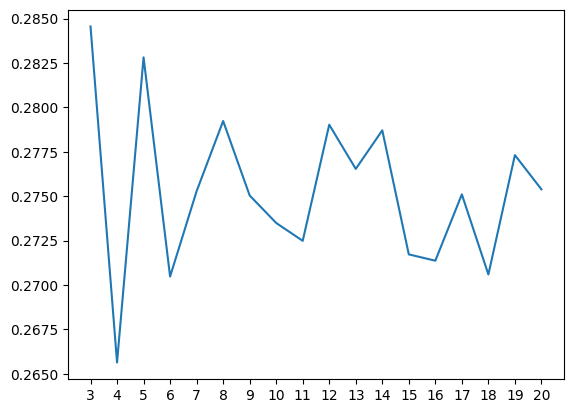

In [ ]:
co_result = coherence_df.groupby(['topic_num']).mean().reset_index()
co_result = co_result.astype({'topic_num':'str'})
plt.plot(co_result['topic_num'], co_result['coherence'])

In [ ]:
co_result.to_csv('/content/drive/MyDrive/NbS/20230418_LDA_coherence_분포.csv', index = False)

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, random_state = 123, passes = 10)

In [ ]:
# 함수 설정 

def format_topics_sentences(data = df ,ldamodel=lda_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num,topn=50)  
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,3), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    print(type(sent_topics_df))

    sent_topics_df = pd.concat([sent_topics_df, df['Title'], df['Year']], axis=1)
    return(sent_topics_df)


In [ ]:
df_topic_sents_keywords = format_topics_sentences(data = df,ldamodel=lda_model, corpus=corpus, texts=id2word)
df_topic_tweet = df_topic_sents_keywords.reset_index()

In [ ]:
df_topic_tweet 

,index,Dominant_Topic,Perc_Contribution,Topic_Keywords,Title,Year
0,0,3,0.985,"city, water, roof, design, infrastructure, sur...",Evolutions of nature based solutions for storm...,2020
1,1,4,0.627,"climate, city, ecosystem, resilience, policy, ...",Climate vulnerability and adaptation challenge...,2021
2,2,0,0.764,"ecosystem, climate, biodiversity, policy, carb...",Technical approach and strategic plan for larg...,2021
3,3,4,0.989,"climate, city, ecosystem, resilience, policy, ...",Mainstreaming nature-based solutions for clima...,2021
4,4,1,0.989,"water, ecosystem, restoration, plant, wetland,...",Future response of global coastal wetlands to ...,2018
...,...,...,...,...,...,...
1051,1051,0,0.980,"ecosystem, climate, biodiversity, policy, carb...",Economic value of recreation - Determinants in...,2012
1052,1052,0,0.981,"ecosystem, climate, biodiversity, policy, carb...",Entering the Fray: The role of outdoor educati...,2014
1053,1053,0,0.989,"ecosystem, climate, biodiversity, policy, carb...",Fascinating remoteness: The dilemma of hiking ...,2010
1054,1054,2,0.776,"soil, vegetation, tree, water, specie, erosion...","First-movers, non-movers, and social gains fro...",2009


In [ ]:
df_topic_tweet.to_csv('/content/drive/MyDrive/NbS/20230418_LDA_결과_df.csv', index = False)

In [ ]:
for i in range(5):
    lda_keyword_weight_i = pd.DataFrame(lda_model.show_topic(i,topn=30))
    lda_keyword_weight_i.columns = ['keyword','prob']
    topic_num = pd.DataFrame(np.array([i] * 30))
    topic_num.columns = ['topic']
    lda_keyword_weight_i_df = pd.concat([topic_num, lda_keyword_weight_i], axis = 1)
    lda_keyword_weight_df = pd.concat([lda_keyword_weight_df,lda_keyword_weight_i_df])

## 연도별로 각 
lda_result =  pd.DataFrame()
lda_result = lda_keyword_weight_df[['topic','keyword']].pivot(index=None, columns= 'topic')
lda_result



keyword                                                 \
topic               0               1              2               3   
0           ecosystem           water           soil            city   
1             climate       ecosystem     vegetation           water   
2        biodiversity     restoration           tree            roof   
3              policy           plant          water          design   
4              carbon         wetland         specie  infrastructure   
5               flood          specie        erosion         surface   
6          mitigation  infrastructure      ecosystem     environment   
7                risk            flow          space           space   
8               water            city          cover          runoff   
9                land       condition            air     stakeholder   
10            wetland            land         health        resource   
11            measure       pollution      condition         climate   
12         adaptation          demand           time      stormwater   
13     sustainability      wastewater           site            land   
14          community           river        density        scenario   
15         governance         climate           city        decision   
16       conservation   concentration           rate       condition   
17     infrastructure     performance          plant     performance   
18             region            time         canopy            heat   
19             people            cost  concentration     temperature   
20        restoration          forest           risk           plant   
21           practice            lake         forest            soil   
22         protection        scenario      shoreline       ecosystem   
23            society          energy           park        drainage   
24               loss           space      reduction          island   
25            erosion       landscape         carbon         problem   
26          diversity      efficiency        climate        activity   
27             forest          period           loss        building   
28               wave        resource      pollution           flood   
29        engineering    biodiversity        biomass          health   

                       
topic               4  
0             climate  
1                city  
2           ecosystem  
3          resilience  
4              policy  
5                risk  
6          adaptation  
7           community  
8      infrastructure  
9               water  
10              flood  
11         governance  
12          landscape  
13               land  
14             action  
15              space  
16          indicator  
17             design  
18               role  
19            barrier  
20         assessment  
21             factor  
22              group  
23        stakeholder  
24        environment  
25           decision  
26             health  
27           practice  
28             review  
29        switzerland

- 2번 토픽이 산림에 가깝다고 판단

In [ ]:
lda_result.to_csv('/content/drive/MyDrive/NbS/20230418_LDA_keyword30.csv', index = False)

In [ ]:
연도별_토픽개수 = df_topic_tweet.groupby(['Year','Dominant_Topic']).size().reset_index()
연도별_토픽개수.rename(columns = {0:'count'}, inplace = True)
연도별_토픽개수 = 연도별_토픽개수.astype({'Year':'str', 'Dominant_Topic':'str'})
연도별_토픽개수

In [ ]:
연도별_토픽개수.to_csv('/content/drive/MyDrive/NbS/20230418_LDA_연도별토픽개수.csv', index = False)

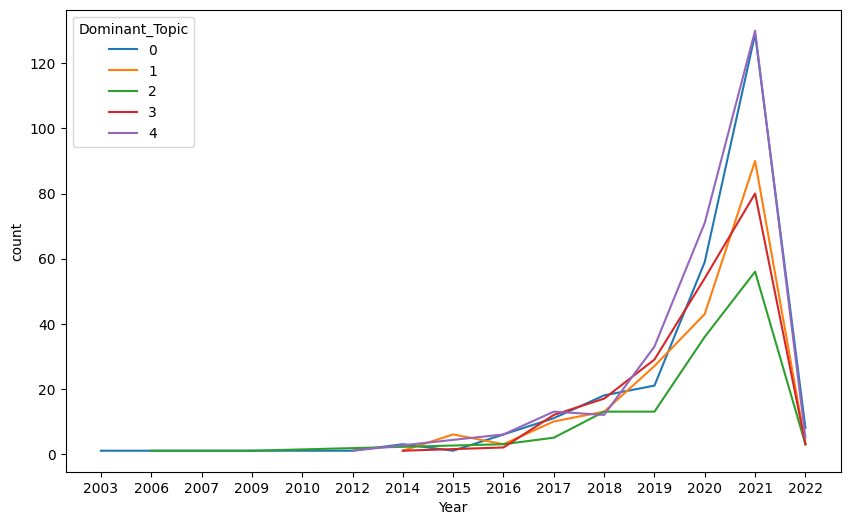

In [ ]:
import seaborn as sns

topic_order = ['0','1','2','3','4']



fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('white')
sns.lineplot(data=연도별_토픽개수, x='Year', y='count', 
             hue='Dominant_Topic',
             hue_order=topic_order)
plt.show()

In [ ]:
# 연도별로 토픽의 비중을 계산하여 데이터프레임으로 출력
for year in df['Year'].unique():
    try:
        year_total_papers = total_papers_per_year[year]
        year_topic_papers = topic_papers_per_year[year]
        for topic, count in year_topic_papers.items():
            proportion = count / year_total_papers
            output_df = output_df.append({
                'Year': year,
                'Topic': topic,
                'Proportion': proportion
            }, ignore_index=True)
    except KeyError:
        continue

In [ ]:
연도별_토픽개수['Year'].unique()

array(['2003', '2006', '2007', '2009', '2010', '2012', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

In [ ]:
total_papers_per_year

,Year,count
0,2003,1
1,2006,1
2,2007,1
3,2009,1
4,2010,1
5,2012,2
6,2014,5
7,2015,7
8,2016,20
9,2017,51


In [ ]:
topic_papers_per_year

,Year,Dominant_Topic,count
0,2003,0,1
1,2006,2,1
2,2007,2,1
3,2009,2,1
4,2010,0,1
5,2012,0,1
6,2012,4,1
7,2014,0,3
8,2014,1,1
9,2014,3,1


In [ ]:
total_papers_per_year.columns

Index(['Year', 'count'], dtype='object')

In [ ]:
total_papers_per_year[total_papers_per_year['Year'] == '2003']

,Year,count
0,2003,1


In [ ]:
year_topic_papers = topic_papers_per_year[topic_papers_per_year['Year'] == '2003']
print(year_topic_papers.items())

<generator object DataFrame.items at 0x7f5be2b91040>


In [ ]:
output_df = pd.DataFrame(columns=['Year', 'Topic', 'Proportion'])

# 연도별로 논문 개수를 계산하여 저장
total_papers_per_year = 연도별_토픽개수.groupby('Year')['count'].sum().reset_index()

# 각 연도별로 토픽 논문 개수를 계산하여 저장
topic_papers_per_year = 연도별_토픽개수.groupby(['Year', 'Dominant_Topic'])['count'].sum().reset_index()

proportion_df = pd.merge(total_papers_per_year, topic_papers_per_year, how = 'right', on = 'Year')
proportion_df.rename(columns = {'count_x':'논문개수',
                                'count_y':'연도별총논문개수'}, inplace = True)
proportion_df['proportion'] = round(proportion_df['논문개수'] / proportion_df['연도별총논문개수'],3)
proportion_df

,Year,논문개수,Dominant_Topic,연도별총논문개수,proportion
0,2003,1,0,1,1.000
1,2006,1,2,1,1.000
2,2007,1,2,1,1.000
3,2009,1,2,1,1.000
4,2010,1,0,1,1.000
5,2012,2,0,1,2.000
6,2012,2,4,1,2.000
7,2014,5,0,3,1.667
8,2014,5,1,1,5.000
9,2014,5,3,1,5.000


In [ ]:
proportion_df.to_csv('/content/drive/MyDrive/NbS/20230418_LDA_연도별토픽비율.csv', index = False)

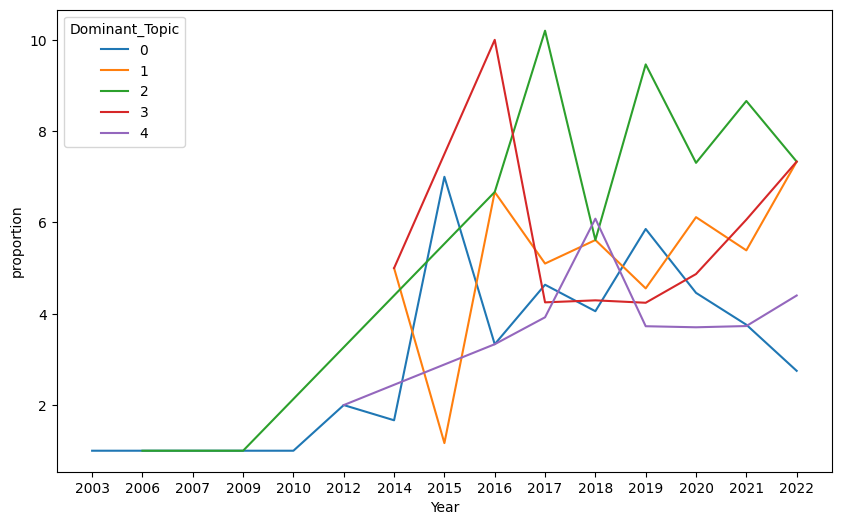

In [ ]:
import seaborn as sns

topic_order = ['0','1','2','3','4']



fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('white')
sns.lineplot(data=proportion_df, x='Year', y='proportion', 
             hue='Dominant_Topic',
             hue_order=topic_order)
plt.show()